# Plotting
We will be plotting using both `seaborn` and `matplotlib`.

The `seaborn` API can be seen here:
https://seaborn.pydata.org/api.html

Most `seaborn` plots are on the form:
```python
sns.SOMEPLOT(x = "VAR0", y = "VAR1", data = df)
```
where `VAR0` and `VAR1` are strings refering to the column names in `df` that you wish to plot, while `df` is a `pandas` DataFrame.

`matplotlib` examples can be found here:
https://matplotlib.org/tutorials/introductory/pyplot.html

In `matplotlib` the syntax is different since one dimensional arrays are passed directly as arguments instead of strings:
```python
plt.SOMEPLOT(x = arr0, y = arr1)
```
where `arr0` and `arr1` contains the data you want to plot.

`seaborn` lets you make a range of standardized plots. We will go through some of them in the following exercises.

## Load libraries
Import `seaborn` and `matplotlib`. Use the abbreviations shown in the slides:

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data
The dataset `titanic_train.csv` will be used in the first exercises, let us start out by loading it into a variable called `df`.

In [49]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')

## Correlation matrix
Create a correlation matrix, which shows the correlation between features and plot it using a heatmap: `sns.heatmap`. If you want to rotate the text on the y-axis this can be done with `plt.yticks(rotation=45)` just before showing the plot.

HINT: A correlation matrix can be made by applying the `corr` method on a `pandas` dataframe: `df.corr()`.

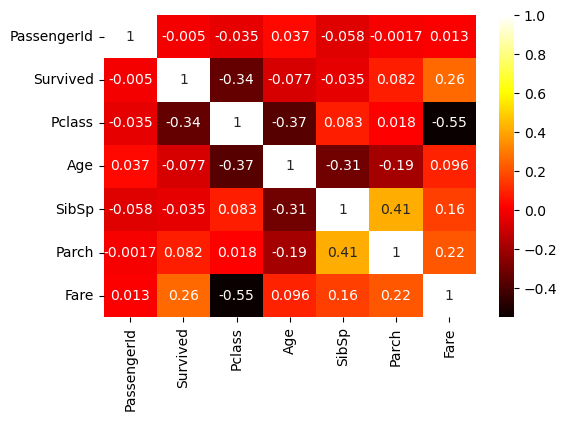

In [50]:
df_corr = df.corr()
plt.figure(dpi=100)
sns.heatmap(df_corr, annot=True, cmap='hot')
plt.show()

In [51]:
#ANS

# Create correlation matrix
df_corr = df.corr()

# Set figure size and resolution
plt.figure(figsize=(9,6), dpi=100)

# Create heatmap
sns.heatmap(df_corr, annot=True, linewidths=0.5)

# Rotate ticks on y-axis
plt.yticks(rotation=45) 

# Show plot
plt.show()

## Barplot
The barplot takes the whole raw dataframe as input, which means you don't need to perform aggregation before passing it to the `barplot` function. Usually you would give a categorical variable as either `x` or `y`, and then a continuous variable as the other argument. Let's assume for now that  `x` is categorical, then the `barplot` function splits the data from the `y` variable into the groups prescribed by `x`. An example could be if `x` is Sex, and `y` is Age, then it creates a group for each value of Sex (which is 2 in the case of the titanic dataset) and uses the function passed in the `estimator` argument on the Age values for each group. The default value of `estimator` is a mean function. Thus if we do the following:
```python
sns.barplot(x = 'Sex', y = 'Age', data = df)
plt.show()
```
It will calculate the mean Age for men and women and make a bar for each one in the resulting plot. We could also change the `estimator` function to something else, e.g. to a median function:
```python
sns.barplot(x = 'Sex', y = 'Age', data = df, estimator = np.median)
plt.show()
```
and thus bars will display the median age for men and women. 

It is also worth noticing that by default error bars are provided on the bars. This is done automatically by creating bootstrap datasets, which are datasets created by randomly picking observations on the actual dataset, in order to create a new dataset. The estimator function is applied on the new dataset, and doing this a lot of times getting different values, can in the end be used to construct a confidence interval. The error bars can be disabled by setting the following argument `n_boot = 1`.

Create a barplot of the survival probability for men and women. Use `sns.barplot`.

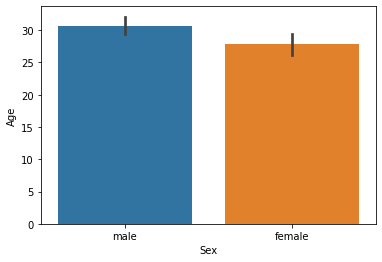

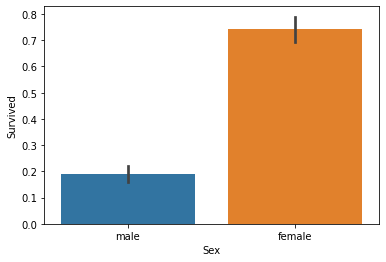

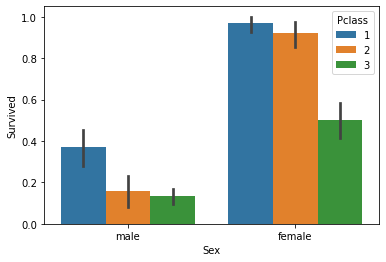

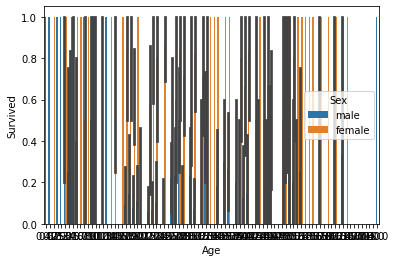

In [52]:
sns.barplot(x = 'Sex', y = 'Age', data = df)
plt.show()
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()
sns.barplot(x = 'Sex', y = 'Survived', hue = "Pclass", data = df)
plt.show()
sns.barplot(x = 'Age', y = 'Survived', hue = "Sex", data = df)
plt.show()

In [53]:
#ANS
sns.barplot(x = 'Sex', y = 'Survived', data = df, n_boot=1)
plt.show()

Create a barplot like the previous one, but where you group on both `Sex` and `PClass`. In order to do this, try to make use of the `hue` argument.

In [54]:
#ANS
sns.barplot(x = 'Sex', y = 'Survived', hue = "Pclass", data = df, n_boot=1)
plt.show()

Try to create the same plot as above, but where you modify the estimator function to calculate the standard deviation. Use `np.std` to calculate the standard deviation. Disable the error bars.

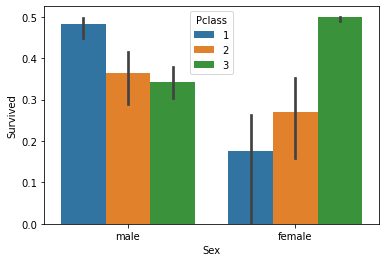

In [55]:
import numpy as np
sns.barplot(x = 'Sex', y = 'Survived', hue = "Pclass", data = df, estimator = np.std)
plt.show()

In [56]:
#ANS
import numpy as np
sns.barplot(x = 'Sex', y = 'Survived', hue = "Pclass", data = df, n_boot=1, estimator = np.std)
plt.show()

Create a plot where the count of `Survived` are showed on the y-axis for both men and women. Use `sns.countplot()` to do so, and notice that you need to use either the `x` and `hue` argument or the `y` and `hue` argument.

In [57]:
#ANS
sns.countplot(x = "Sex", hue = "Survived", data = df)
plt.show()

sns.countplot(y = "Sex", hue = "Survived", data = df)
plt.show()

### Pokemon
Let us now do some plots using the Pokemon dataset from `Pokemon.csv`.

In [58]:
poke = pd.read_csv('Pokemon.csv', encoding = 'latin1')

Create a barplot showing the mean Attack for each Type 1.

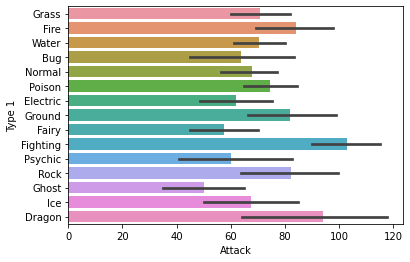

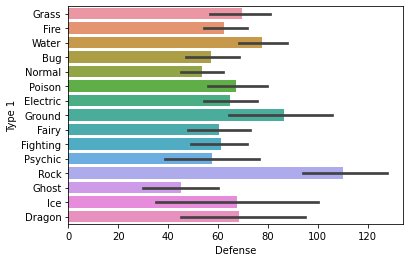

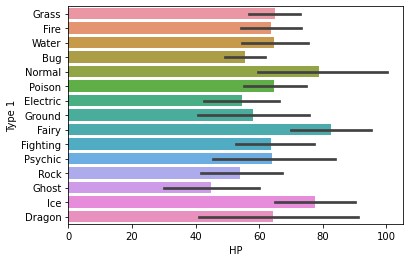

In [59]:
sns.barplot(x = 'Attack', y = 'Type 1', data = poke)
plt.show()
sns.barplot(x = 'Defense', y = 'Type 1', data = poke)
plt.show()
sns.barplot(x = 'HP', y = 'Type 1', data = poke)
plt.show()

In [60]:
#ANS
sns.barplot(x = 'Attack', y = 'Type 1', data = poke, n_boot = 1)
plt.show()

## Scatter plot
Scatter plots are quite useful for visualizing data. Use the iris dataset and plot columns `Sepal.Length` and `Sepal.Width` in a scatter plot. Do it using both `seaborn`'s `scatterplot` function and `matplotlib`'s `scatter` function.

In [61]:
# Load data
iris = pd.read_csv('iris.csv', header = 0, sep = ";", index_col = 0, decimal = ",")

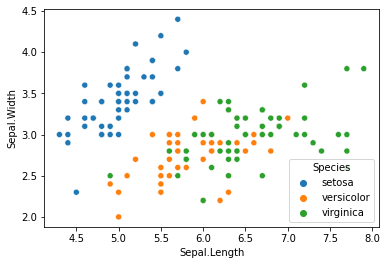

In [62]:
sns.scatterplot(x = "Sepal.Length", y = "Sepal.Width", hue = "Species", data = iris)
plt.show()

In [63]:
#ANS

# Plot
sns.scatterplot(x = "Sepal.Length", y = "Sepal.Width", hue = "Species", data = iris)
plt.show()

# Matplotlib
plt.scatter(iris['Sepal.Length'], iris['Sepal.Width'])
plt.show()

## Boxplot
We will do a couple of boxplots based on the pokemon dataset using `sns.boxplot` function.

Try to create a boxplot of the following stats: Attack, Defense and Speed. The boxplot is quite simple to use, as you only need to use the `data` argument.

If you are unfamiliar with boxplots, you can read more about them here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
Otherwise you can skip to the next exercise.

In [64]:
#ANS
sns.boxplot(data = poke[['Attack', 'Defense', 'Speed']])
plt.title("Boxplot")
plt.show()

## Time series plot
Load the `sp500.csv` dataset and make a timeseries plot of the closing price. It is possible to plot a column directly by calling the `plot` method. However, it is necessary that the time column is loaded as an index. So when reading in the data, one has to point the `index_col` argument to the column containing the dates. Also make sure to use the `parse_dates` argument to read the time column correctly.
```python
df = read_csv("example_time_series_data.csv", parse_dates = ['date'], index_col=0)
```
where in this example the `date` column is column 0.

After that, a time series plot can be made by calling the `plot` method
```python
df["time_dep_variable"].plot()
```


In [65]:
#ANS

# Load data
sp = pd.read_csv('sp500.csv', parse_dates = ['Date'], index_col=0)

# Set quality
plt.figure(dpi=300)

# Plot
f = sp['Close'].plot(legend = True)

# Show
plt.show()

Another approach to plotting time series data is to use the function `plot_date` in matplotlib. Try to plot the closing price of the sp500 dataset using this function. For this approach you should not load the `Date` column as an index.

You can modify the looks of the plot using the `fmt` argument, which takes a string, e.g. `'r-'` where `r` means red and `-` means draw a line.

In [66]:
#ANS

# Load data
sp = pd.read_csv('sp500.csv', parse_dates = ['Date'])

# Set quality
plt.figure(dpi=300)

# Plot
plt.plot_date(x = sp['Date'], y = sp['Close'], fmt ='r-')

# Show
plt.show()

### Multiple plots
In this exercise we will plot the opening and the closing price within the same plot using `plot_date`. In such a case, it is important to have legend, which denotes which variable each line belongs to. This can be done using the `label` argument in  `plot_date`. The following shows an example using the regular `plot` function with random data.

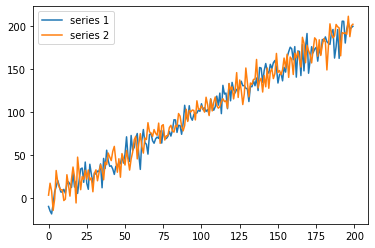

In [79]:
# Generate random data
n = 200
data_x = np.arange(n)
data_y1 = data_x + np.random.normal(0, 10,n)
data_y2 = data_x + np.random.normal(1,10, n)

# Add the two plots
plt.plot(data_x, data_y1, label="series 1")
plt.plot(data_x, data_y2, label="series 2")

# Draw legend
plt.legend()

# Show plot
plt.show()

Now make the plot containing the closing and opening price of the S&P 500 data set.

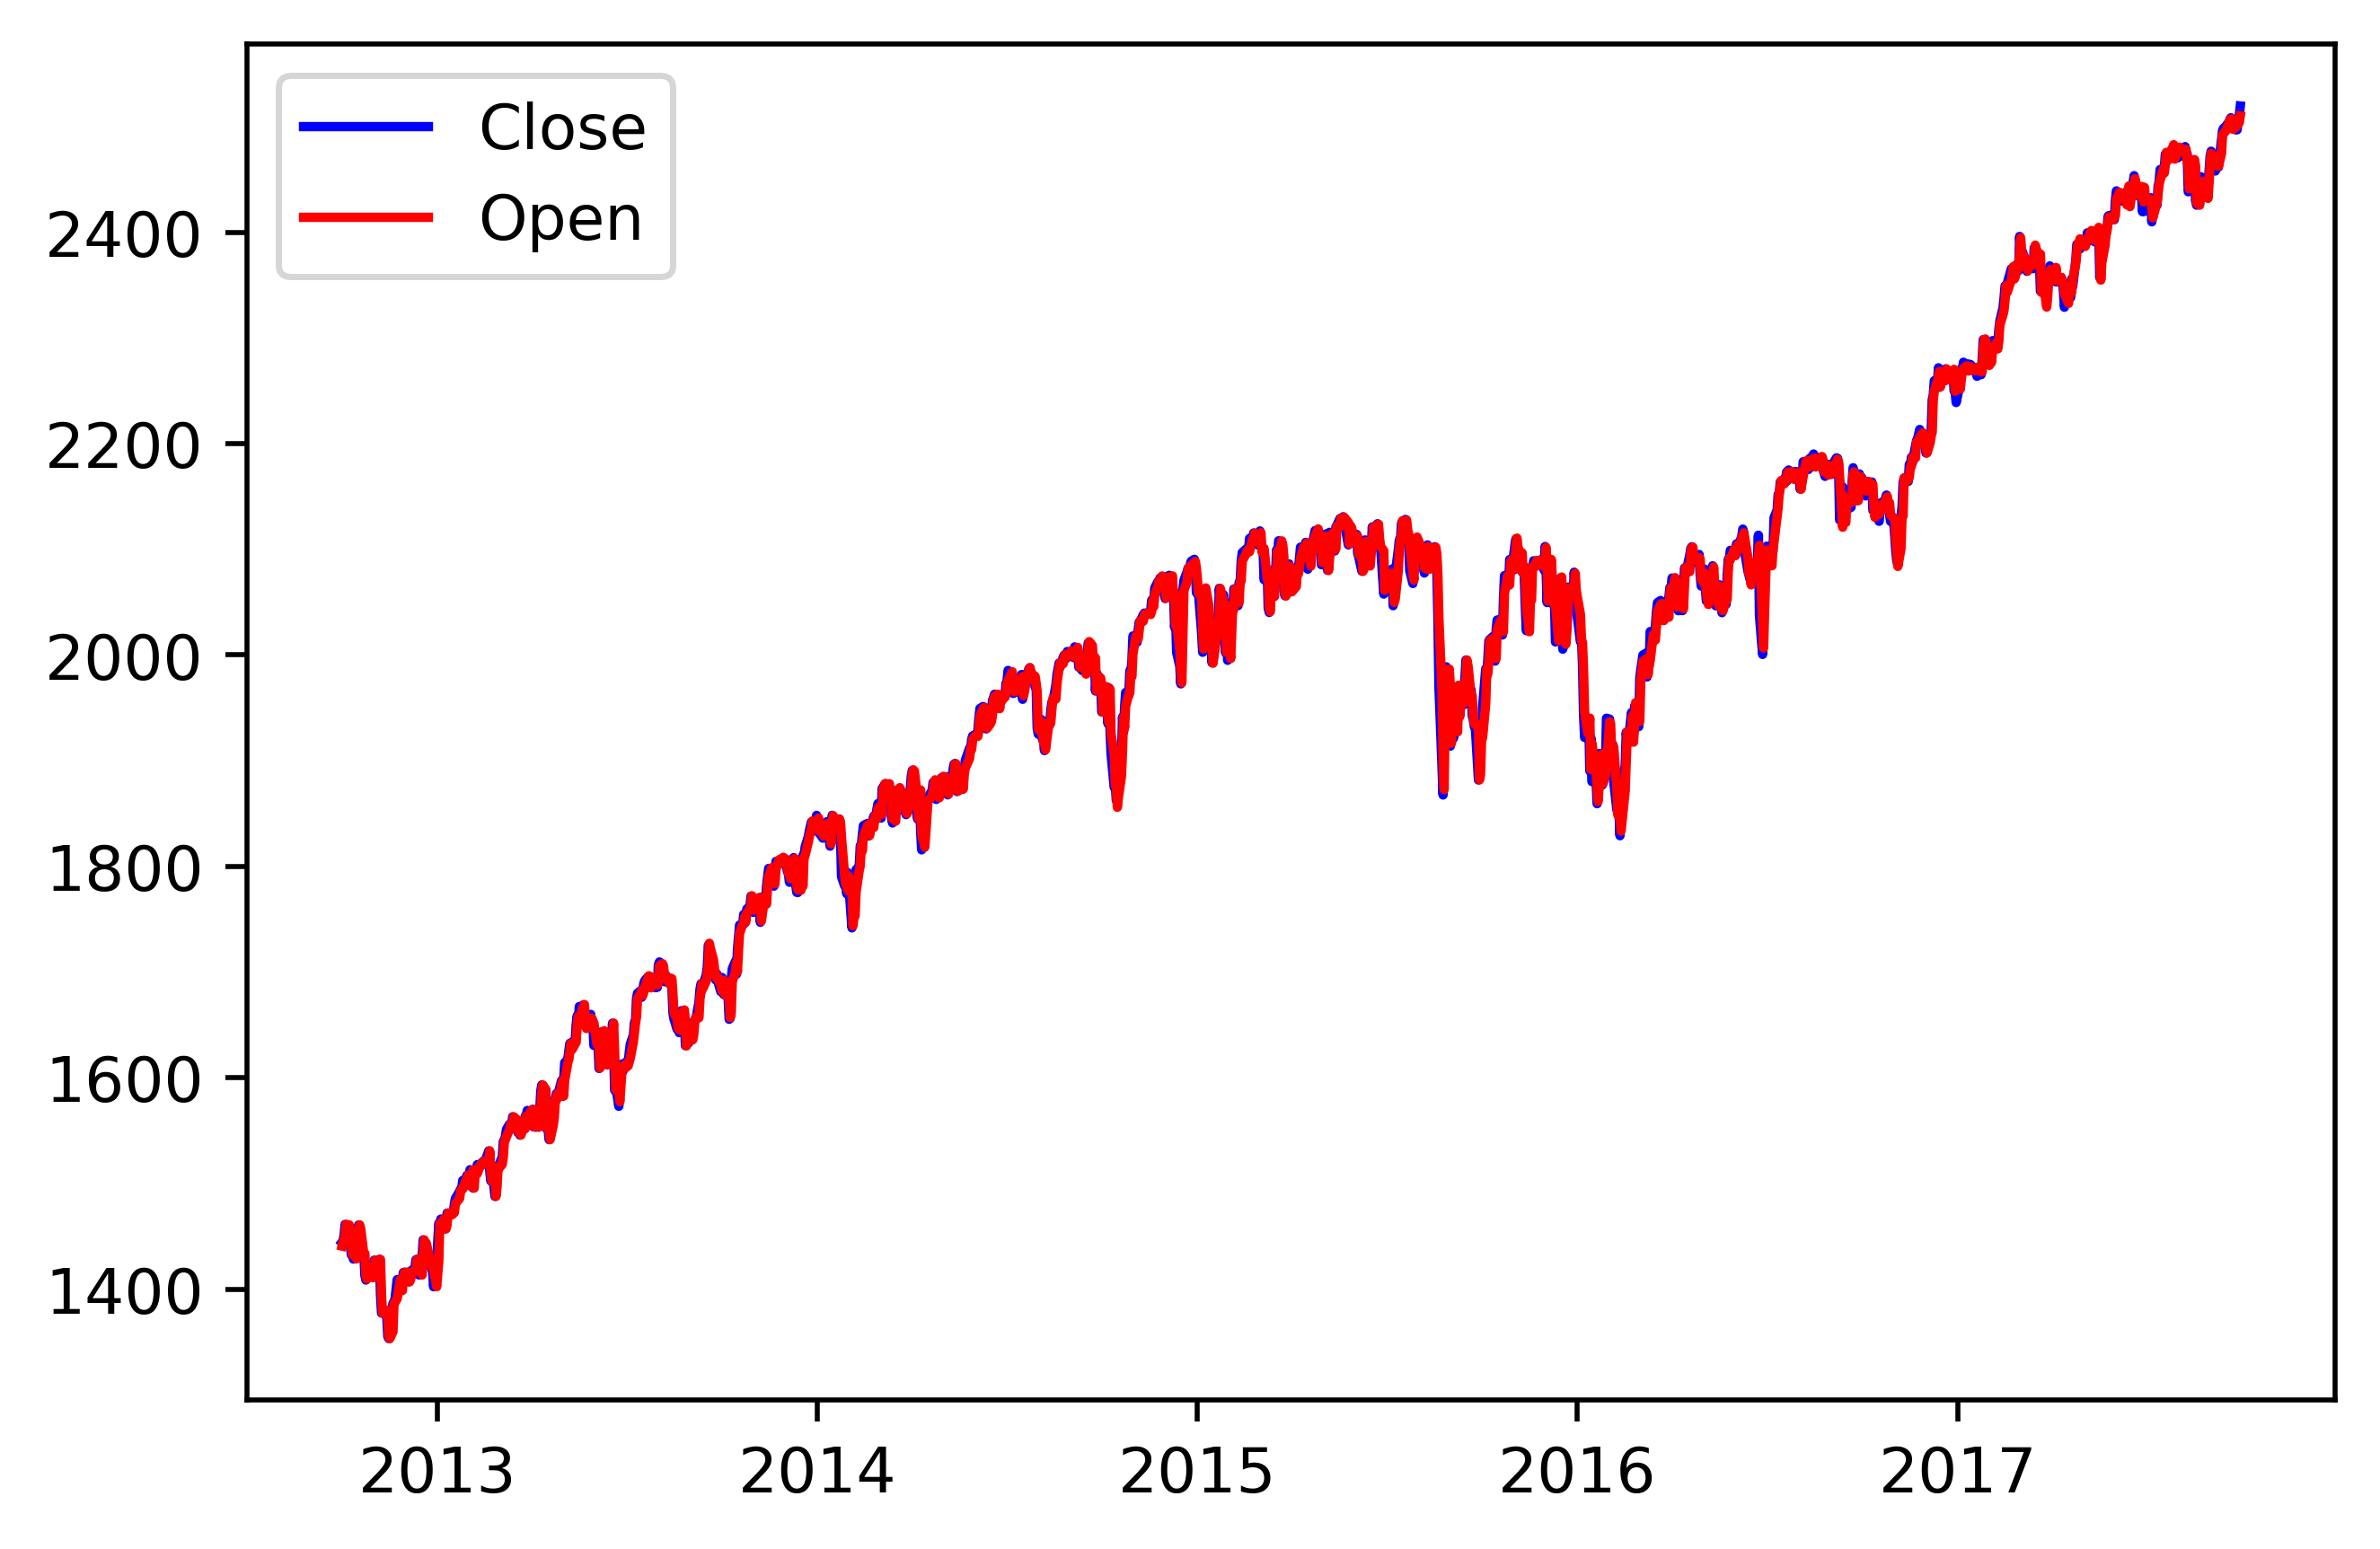

In [80]:
#ANS

# Make large figure
plt.figure(dpi=500)

# Add the two plots
plt.plot_date(sp['Date'], sp['Close'], label="Close", fmt="b-")
plt.plot_date(sp['Date'], sp['Open'], label="Open", fmt="r-")

# Draw legend
plt.legend()

# Show plot
plt.show()

# Subplots
We are now going to make some subplots. An example of the syntax with 2 rows and 2 columns can be seen here:
```python
    fig, ax = plt.subplots(2, 2)
    ax[i,j].plot(x,y)
 ```
where `i` and `j` can be either 0 or 1.

For 1 row and 2 columns:
```python
    fig, ax = plt.subplots(1, 2)
    ax[i].plot(x,y)
 ```
where `i` can be either 0 or 1.


Let us try to make a 1 by 2 subplot where the first plot contains the S&P 500 closing price, and the other contains the opening price.
    

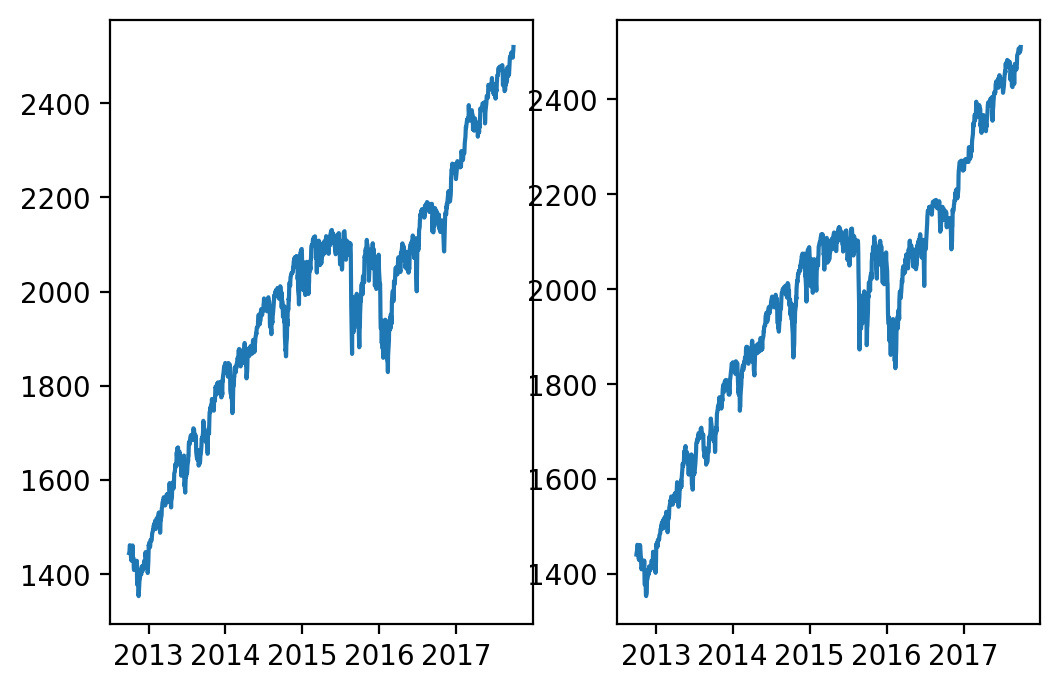

In [81]:
#ANS

fig, ax = plt.subplots(1, 2, dpi=200)
ax[0].plot_date(x = sp['Date'], y = sp['Close'], fmt="-")
ax[1].plot_date(x = sp['Date'], y = sp['Open'], fmt="-")
plt.show()

# Bonus exercises

Now we will create subplots based on the pokemon dataset. We will create 4 plots as `plt.subplots(2,2)`. Try to plot `Attack` as a function of `Defense` using the `plt.plot` function. In the first plot try to sort the `Defense` values and make sure to plot the corresponding `Attack` values. In the next plot do the same thing, but dont sort the values.

In the third plot do the same as in the first plot, but use `plt.scatter` instead of `plt.plot`. The fourth plot should be the same as the second plot but also using `plt.scatter` instead of `plt.plot`

How does the sorting affect the plot when using `plt.scatter` and how when using `plt.plot`?

HINTS:
- For sorting the pairs use `np.argsort` which gives the indices of the sorted values. See the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html).

In [70]:
#ANS
import matplotlib.pyplot as plt
import numpy as np

# Get indices of sorted defense vector
idx_def = np.argsort(poke['Defense'])

# Get sorted defense values
sort_def = poke['Defense'][idx_def]

# Get corresponding attack values
sort_atk = poke['Attack'][idx_def]

# Create subplot
fig, ax = plt.subplots(2, 2)

# Add scatter sorted defense/attack plot
ax[0, 0].scatter(sort_def, sort_atk)

# Add scatter unsorted defense/attack plot
ax[0, 1].scatter(poke['Defense'], poke['Attack'])

# Add plot sorted defense/attack plot
ax[1, 0].plot(sort_def, sort_atk)

# Add plot unsorted defense/attack plot
ax[1, 1].plot(poke['Defense'], poke['Attack'])

# Show plot
plt.show()

Create a barplot using the Titanic dataset with Sex on the `x` axis and figure out how to count the number of observations for men and women. You are not allowed to use the `countplot` (As you would normally do). Instead you should try to modify the `estimator`.  You can use the following to check your result against:
```python
sns.countplot(x = "Sex", data = df)
plt.show()
```

In [71]:
#ANS

# Solution 1
import numpy as np
sns.barplot(x = df.Sex, y = df.Survived, n_boot=1, estimator = lambda x: x.shape[0])
plt.show()

# Solution 2
def count_func(x):
    '''
    Function to get length of array.
    '''
    return x.shape[0]

sns.barplot(x = df.Sex, y = df.Survived, n_boot=1, estimator = count_func)
plt.show()

## `if time_left > 0:`
Go to the webpage below and follow one of the tutorials, that you find the most relevant:

https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

In [72]:
#CONFIG
from IPython.core.display import HTML
# Hide code tagged with #ANS
HTML('''<script>
function code_hide() {
    var cells = IPython.notebook.get_cells()
    cells.forEach(function(x){ if(x.get_text().includes("#ANS")){
        if (x.get_text().includes("#CONFIG")){

        } else{
            x.input.hide()
            x.output_area.clear_output()
        }

        
    }
    })
}
function code_hide2() {
    var cells = IPython.notebook.get_cells();
    cells.forEach(function(x){
    if( x.cell_type != "markdown"){
        x.input.show()      
    }
    
        });
} 
$( document ).ready(code_hide);
$( document ).ready(code_hide2);
</script>
<form action="javascript:code_hide()"><input type="submit" value="Hide answers"></form>
<form action="javascript:code_hide2()"><input type="submit" value="Show answers"></form>''')